# Regression
## Linear Regression
Let us start from the simple case in which we want to approximate our target function with a line. We have a dataset D with n pairs:
$$
D = \{(x_1,y_1), ... ,(x_N,y_N)\}
$$
and we want to approximate the targets as a linear function of the input:
$$
\hat{y_i} = a x_i + b 
$$
## Closed form Solution
From the previous lecture we saw that for the regression problems we need to minimize the Mean Squared Error (MSE) between the predicted values and the targets with respect to the model parameters:
$$
MSE = \frac{1}{2} \sum_{n=1}^N (y_n - \hat{y}_n)^2
$$
In our case the model is just a line, with parameters a and b:

To simplify the calculations let us call __w__ the vector with the parameters of the model:
$$
\mathbf{w} = \begin{pmatrix} b \\ a \end{pmatrix}
$$
Let us also write the points in the domain in vector notation:
$$
\mathbf{x_i} = \begin{pmatrix} 1 \\ x_i\end{pmatrix}
$$
Now let us introduce the vector __y__ with the target values of each point in the dataset:
$$
\mathbf{y} = \begin{pmatrix}y_1 \\ ... \\ y_n\end{pmatrix}
$$
and the matrix $\mathbb{X}$ which rows are the points in the domain:
$$
\mathbb{X} = \begin{pmatrix}1 & x_1 \\ 1 & x_2 \\ . & . \\ . & . \\ 1 & x_n\end{pmatrix}
$$
Now we can write the cost function in vector notation:
$$
L_D(\mathbf{w}) = \frac{1}{2} \sum_{n=1}^N (y_n - \mathbf{w}^T \mathbf{x_n})^2 = || \mathbf{y} - \mathbb{X} \mathbf{w} ||^2
$$
The function L is a convex function with respect to the parameters, hence we can find the minimum by solving the linear system of equations:
$$
\nabla_{\mathbf{w}}L = 0
$$
We are in the lucky case in which the solution to this system can be computed in closed form. Lets walk through the computation:
$$
\nabla_{\mathbf{w}}L = -2 \mathbf{X}^T (\mathbf{y}-\mathbb{X}\mathbf{w}) = 0
$$
$$
\mathbf{w} = (\mathbb{X}^T\mathbb{X})^{-1}\mathbb{X}^T\mathbf{y}
$$

## Python Implementation

In [ ]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm

: 

: 

In [ ]:
NPOINTS = 100

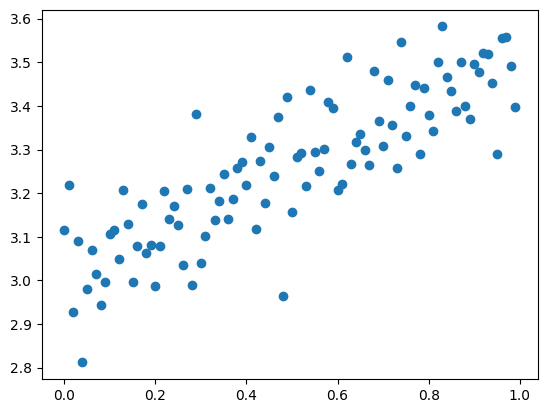

In [ ]:
# create the dataset taking points along the x axis
x = np.arange(0,1,1/NPOINTS)
# to simulate true data, we take the true y value and
# add some gaussian noise
y = 0.5 * x + 3 + np.random.normal(loc=0,scale=.1,size=NPOINTS)
# plot the dataset: (x,y) pairs
fig,ax = plt.subplots()
ax.scatter(x,y)
plt.show()

In [ ]:
# create the matrix X
X = np.stack([
    np.ones_like(x),x
],axis=-1)

X.shape

(100, 2)

In [ ]:
X_t = np.transpose(X)

X_t.shape

(2, 100)

In [ ]:
# compute the model parameters, we can verify
# that they are similar to the true parameters
w = np.linalg.inv(X_t @ X) @ X_t @ y
w

array([3.01203432, 0.49996347])

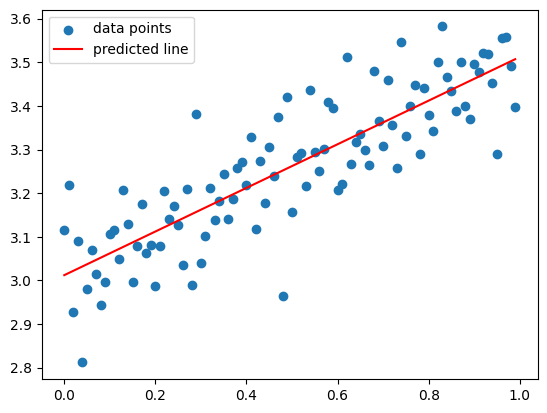

In [ ]:
# compute the predicted line
# using the weights of the 
# model
y_pred = w[0] + w[1] * x
# plot the predicted line against
# data points
fig,ax = plt.subplots()
ax.scatter(x,y,label="data points")
ax.plot(x,y_pred,c="r",label="predicted line")
ax.legend()
plt.show()

The same approach can be applied to learn a linear function (a plane in $R^3$ or a hyperplane in $R^N$) in a higher dimensional space. Let's work out the same example in 3 dimensions

In [ ]:
NSAMPLES = 10
# sample the x and y coordinates 
# of the data points
x1 = np.arange(0,1,1/NSAMPLES)
x2 = np.arange(0,1,1/NSAMPLES)
# compute the true value of the function and add gaussian noise
# to simulate real data. The function is computed using 
# broadcasting
y = .5 * x1[:,None] + 3.* x2[None,:] + 3 + np.random.normal(loc=0,scale=.1,size=NSAMPLES)

y.shape

(10, 10)

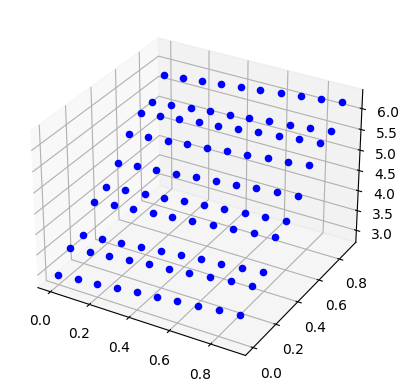

In [ ]:
# plot the dataset: ((x1,x2), y) pairs
fig,ax = plt.subplots(subplot_kw={"projection": "3d"})
for i in range(NSAMPLES):
    for j in range(NSAMPLES):
        ax.scatter(x1[i],x2[j],y[i,j],c="b")
plt.show()


In [ ]:
# compute the matrix X, we have a line for each point.
# Note that now if we have NSAMPLES samples on the x1 axis
# and NSAMPLES samples on the x2 axis we have 
# NSAMPLES * NSAMPLES points
X = []
for i in range(NSAMPLES):
    for j in range(NSAMPLES):
        X.append(np.asanyarray([[1,x1[i],x2[j]]]))
X = np.concatenate(X,axis=0)
X.shape

(100, 3)

In [ ]:
# compute the model parameters
X_t = np.transpose(X)
w = np.linalg.inv(X_t @ X) @ X_t @ y.flatten()
w

array([2.94864737, 0.5       , 3.12362837])

In [ ]:
# compute the predicted values using the 
# model parameters
y_pred = w[0] + w[1] * x1[:,None] + w[2] * x2[None,:]

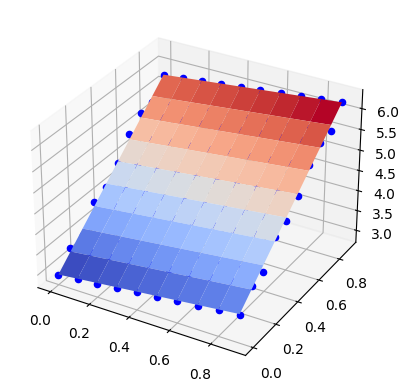

In [ ]:
# plot the data points along with the predicted
# plane
fig,ax = plt.subplots(subplot_kw={"projection": "3d"})
for i in range(NSAMPLES):
    for j in range(NSAMPLES):
        ax.scatter(x1[i],x2[j],y[i,j],c="b")

X1 = x1[:,None]
X2 = x2[None,:]
X1 = np.repeat(X1,NSAMPLES,axis=1)
X2 = np.repeat(X2,NSAMPLES,axis=0)   
ax.plot_surface(X1,X2,y_pred,cmap=cm.coolwarm)
plt.show()

## Kernel Regression
Up to now we have seen how to approximate our dataset with a linear function, but what if the unknown function f is non-linear? We can still use linear regression but we need to transform the points in a feature space. Lets go back to the one dimensional case, but this time we want to approximate a degree 5 polynomial in the interval `[-10,10]`:
$$
f(x) = \frac{2}{\sqrt{3}\pi^{1/4}}(1- x^2)e^{-\frac{x^2}{2}}
$$
In order to use linear regression we need to project the points into a higher dimensional feature space using the mapping $\phi$:
$$
\phi : R \rightarrow R^d \quad \text{s.t.} \quad \phi(x) = \begin{pmatrix}\phi_0(x) \\ \phi_1(x) \\ ... \\ \phi_d(x) \end{pmatrix}
$$
For example we can project x into the space of polynomials of degree d:
$$
\phi(x) = \begin{pmatrix}1 \\ x \\ x^2 \\ ... \\ x^d \end{pmatrix}
$$
We can use the exact formulation we used before by just replacing the matrix $\mathbb{X}$ with the matrix $\mathbb{\Phi}$ defined as:
$$
\mathbb{\Phi} = \begin{pmatrix}
    \phi_1(x_1) & \phi_1(x_1) & ... & \phi_d(x_1) \\
    \phi_1(x_2) & \phi_1(x_2) & ... & \phi_d(x_2) \\
    ... & ... & ... & ... \\
    \phi_1(x_n) & \phi_1(x_n) & ... & \phi_d(x_n)
    \end{pmatrix}
$$
and also the weights vector to match the number of dimensions of the feature space:
$$
\mathbb{w} = \begin{pmatrix}w_1 \\ ...\\ w_d\end{pmatrix}
$$
The reason why we can use the closed form solution is that, even tough the cost function (MSE) is no more a linear function of the data points, it is still linear with respect the model parameters:
$$
L_D(\mathbf{w}) = \frac{1}{2} \sum_{n=1}^N (y_n - \mathbf{w}^T \mathbf{\phi(x_n)})^2 = || \mathbf{y} - \mathbb{\Phi} \mathbf{w} ||^2
$$

In [ ]:
NPOINTS = 20
DEGREE = 5

In [ ]:
def poly(x):
    return x**5 - 3.5*x**4 + 4.2*x**3 - 5.7*x**2 + x -2 + np.random.normal(loc=0,scale=1,size=NPOINTS)

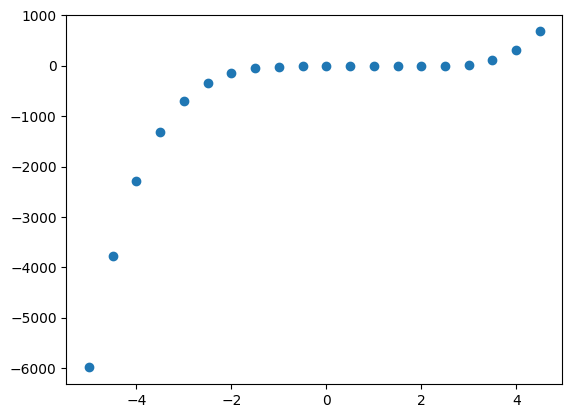

In [ ]:
# create the dataset taking points along the x axis
x = np.arange(-5,5,10/NPOINTS)
# to simulate true data, we take the true y value and
# add some gaussian noise
y = poly(x)
# plot the dataset: (x,y) pairs
fig,ax = plt.subplots()
ax.scatter(x,y)
plt.show()

In [ ]:
# create the matrix PHI
PHI = np.stack([
    x**d for d in range(DEGREE)
],axis=-1)

PHI.shape

(20, 5)

In [ ]:
PHI_t = np.transpose(PHI)
w = np.linalg.inv(PHI_t @ PHI) @ PHI_t @ y
w

array([ -37.91623089, -137.38837247,   14.60420665,   30.8793694 ,
         -4.747898  ])

In [ ]:
# compute the predicted line
# using the weights of the 
# model
y_pred = np.ones(shape=(NPOINTS))
for d in range(DEGREE):
    y_pred += w[d] * x**d


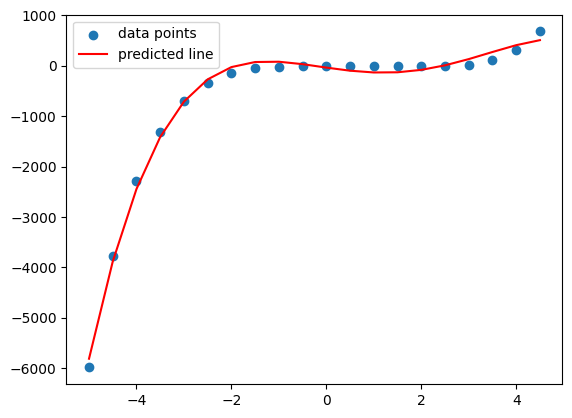

In [ ]:
# plot the predicted line against
# data points
fig,ax = plt.subplots()
ax.scatter(x,y,label="data points")
ax.plot(x,y_pred,c="r",label="predicted line")
ax.legend()
plt.show()